$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Rauzy induction of polygon partitions and toral $\mathbb{Z}^2$-rotations

This file contains the Sage code contained in the preprints:

> -   [arXiv:1906.01104v1](https://arxiv.org/abs/1906.01104v1), June 2019, 36 p.
> -   [arXiv:1906.01104v2](https://arxiv.org/abs/1906.01104v2), May 2020, 40 p.
> -   [arXiv:1906.01104v3](https://arxiv.org/abs/1906.01104v3), January 2021, 40 p.

The Jupyter notebook `arXiv_1906_01104.ipynb` is created from `arXiv_1906_01104.rst` with the command `sage -rst2ipynb arXiv_1906_01104.rst arXiv_1906_01104.ipynb`. The file `arXiv_1906_01104.rst` is in the `slabbe/demos` directory of the optional SageMath package [slabbe](https://pypi.org/project/slabbe/).

Running all examples below with `sage -t arXiv_1906_01104.rst` takes 10 seconds with sage-9.1 and slabbe-0.6.1 (or with sage-9.2 and slabbe-0.6.2).

In [1]:
%display latex           # not tested

First we construct the golden mean as a element of a quadratic number field because it is more efficient for arithmetic operations and comparisons:

In [2]:
z = polygen(QQ, 'z')
K = NumberField(z**2-z-1, 'phi', embedding=RR(1.6))
phi = K.gen()

We import the polygon partition $\mathcal{P}_0$ of $\mathbb{R}^2/\Gamma_0$ : which is predefined in `slabbe` :

In [3]:
from slabbe.arXiv_1903_06137 import jeandel_rao_wang_shift_partition
P0 = jeandel_rao_wang_shift_partition()
P0

Polyhedron partition of 24 atoms with 11 letters

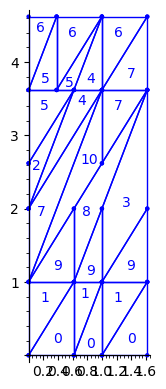

In [4]:
P0.plot()                    # optional long

We import polyhedron exchange transformations from the package:

In [5]:
from slabbe import PolyhedronExchangeTransformation as PET

We define the lattice $\Gamma_0$ and the maps $R_0^{e_1}$, $R_0^{e_2}$ which can be seen as a polygon exchange transformations on a rectangular fundamental domain of $\mathbb{R}^2/\Gamma_0$ :

In [6]:
Gamma0 = matrix.column([(phi,0), (1,phi+3)])
fundamental_domain = polytopes.parallelotope([(phi,0), (0,phi+3)])
R0e1 = PET.toral_translation(Gamma0, vector((1,0)), fundamental_domain)
R0e2 = PET.toral_translation(Gamma0, vector((0,1)), fundamental_domain)

The following allows to compute the induced partition $\mathcal{P}_1$ of $\mathbb{R}^2/\Gamma_1$, the substitution $\beta_0$ and the $\mathbb{Z}^2$-action $R_1$ on $\mathbb{R}^2/\Gamma_1$.

In [7]:
y_le_1 = [1, 0, -1]   # syntax for the inequality y <= 1
P1,beta0 = R0e2.induced_partition(y_le_1, P0, substitution_type='column')
R1e1,_ = R0e1.induced_transformation(y_le_1)
R1e2,_ = R0e2.induced_transformation(y_le_1)

In [8]:
R1e1

Polyhedron Exchange Transformation of
Polyhedron partition of 2 atoms with 2 letters
with translations {0: (-phi + 1, 0), 1: (1, 0)}

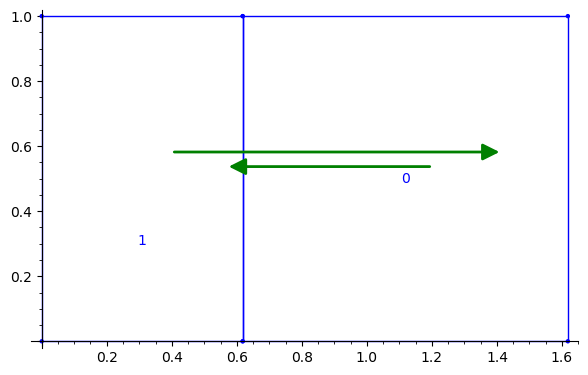

In [9]:
R1e1.plot()              # optional long

In [10]:
R1e2

Polyhedron Exchange Transformation of
Polyhedron partition of 4 atoms with 4 letters
with translations {0: (-1, -phi + 1), 1: (phi - 1, -phi + 1), 2: (-1, -phi + 2), 3: (phi - 1, -phi + 2)}

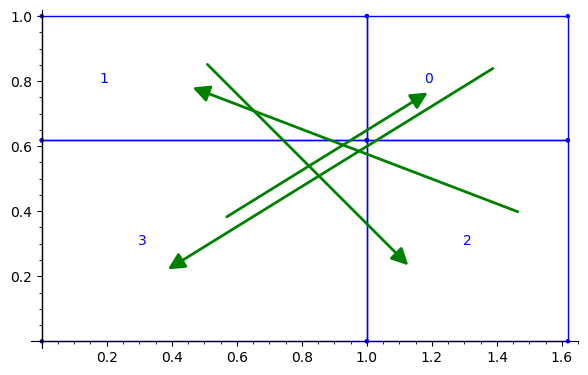

In [11]:
R1e2.plot()              # optional long

In [12]:
P1

Polyhedron partition of 30 atoms with 28 letters

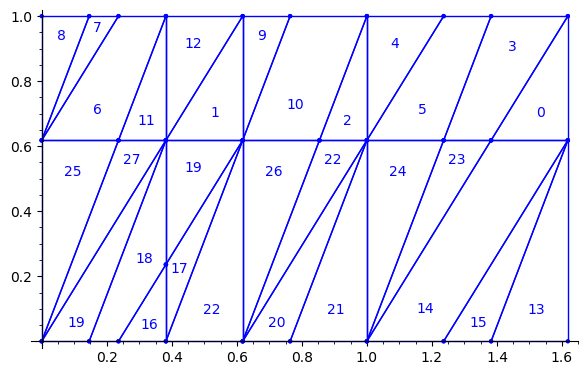

In [13]:
P1.plot()                    # optional long

In [14]:
beta0

Substitution 2d: {0: [[0, 9, 3, 7]], 1: [[0, 9, 7, 5]], 2: [[0, 9, 10, 4]], 3: [[1, 3, 3, 7]], 4: [[1, 3, 7, 6]], 5: [[1, 3, 8, 7]], 6: [[1, 7, 2, 5]], 7: [[1, 7, 5, 5]], 8: [[1, 7, 5, 6]], 9: [[1, 8, 7, 5]], 10: [[1, 8, 10, 4]], 11: [[1, 10, 4, 5]], 12: [[1, 10, 4, 6]], 13: [[0, 9, 3, 3, 7]], 14: [[0, 9, 3, 7, 6]], 15: [[0, 9, 3, 8, 7]], 16: [[0, 9, 7, 2, 5]], 17: [[0, 9, 7, 2, 6]], 18: [[0, 9, 7, 5, 5]], 19: [[0, 9, 7, 5, 6]], 20: [[0, 9, 8, 7, 5]], 21: [[0, 9, 8, 10, 4]], 22: [[0, 9, 10, 4, 6]], 23: [[1, 3, 3, 7, 6]], 24: [[1, 3, 8, 7, 6]], 25: [[1, 7, 2, 5, 6]], 26: [[1, 8, 10, 4, 6]], 27: [[1, 10, 4, 5, 6]]}

We keep $\mathcal{P}_2$, $\Gamma_2$ equal to $\mathcal{P}_1$, $\Gamma_1$ and we change the base of the action to get the $\mathbb{Z}^2$-action $R_2$ on $\mathbb{R}^2/\Gamma_2$.

In [15]:
Gamma2 = Gamma1 = matrix.column([(phi,0), (0,1)])
P2 = P1
R2e1 = R1e1
R2e2 = (R1e1 * R1e2).merge_atoms_with_same_translation()

The following confirms that the $R_2^{\boldsymbol{e}_2}$ is now a vertical rotation on the torus $\mathbb{R^2}/\Gamma_2$.

In [16]:
R2e2

Polyhedron Exchange Transformation of
Polyhedron partition of 2 atoms with 2 letters
with translations {0: (0, -phi + 1), 1: (0, -phi + 2)}

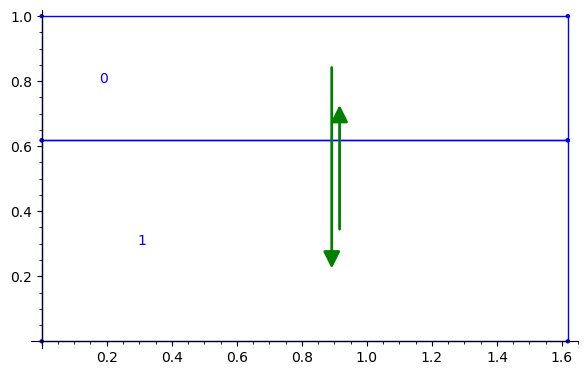

In [17]:
R2e2.plot()              # optional long

The following allows to compute the induced partition $\mathcal{P}_3$ of $\mathbb{R}^2/\Gamma_3$, the substitution $\beta_2$ and the $\mathbb{Z}^2$-action $R_3$ on $\mathbb{R}^2/\Gamma_3$.

In [18]:
x_le_1 = [1, -1, 0]   # syntax for x <= 1
P3,beta2 = R2e1.induced_partition(x_le_1, P2, substitution_type='row')
R3e1,_ = R2e1.induced_transformation(x_le_1)
R3e2,_ = R2e2.induced_transformation(x_le_1)
R3e1

Polyhedron Exchange Transformation of
Polyhedron partition of 2 atoms with 2 letters
with translations {0: (-phi + 1, 0), 1: (-phi + 2, 0)}

In [19]:
P3

Polyhedron partition of 21 atoms with 20 letters

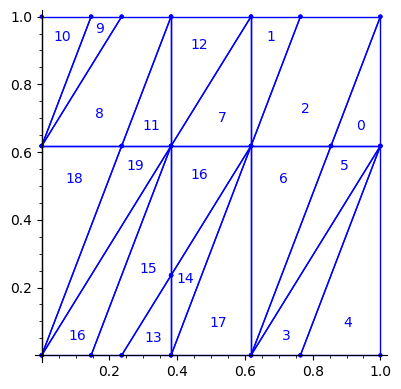

In [20]:
P3.plot()                    # optional long

In [21]:
beta2

Substitution 2d: {0: [[2]], 1: [[9]], 2: [[10]], 3: [[20]], 4: [[21]], 5: [[22]], 6: [[26]], 7: [[1], [0]], 8: [[6], [5]], 9: [[7], [4]], 10: [[8], [4]], 11: [[11], [3]], 12: [[12], [3]], 13: [[16], [15]], 14: [[17], [15]], 15: [[18], [14]], 16: [[19], [14]], 17: [[22], [13]], 18: [[25], [24]], 19: [[27], [23]]}

The following allows to compute the induced partition $\mathcal{P}_4$ of $\mathbb{R}^2/\Gamma_4$, the substitution $\beta_3$ and the $\mathbb{Z}^2$-action $R_4$ on $\mathbb{R}^2/\Gamma_4$

In [22]:
x_le_phi_inv = [phi^-1, -1, 0]    # syntax for x <= phi^-1
P4,beta3 = R3e1.induced_partition(x_le_phi_inv, P3, substitution_type='row')
R4e1,_ = R3e1.induced_transformation(x_le_phi_inv)
R4e2,_ = R3e2.induced_transformation(x_le_phi_inv)
R4e2

Polyhedron Exchange Transformation of
Polyhedron partition of 2 atoms with 2 letters
with translations {0: (0, -phi + 1), 1: (0, -phi + 2)}

In [23]:
P4

Polyhedron partition of 21 atoms with 20 letters

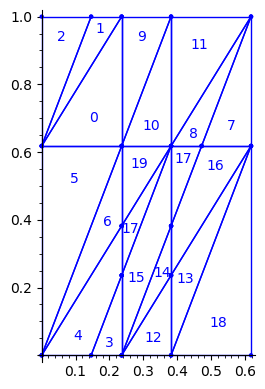

In [24]:
P4.plot()                    # optional long

In [25]:
beta3

Substitution 2d: {0: [[8]], 1: [[9]], 2: [[10]], 3: [[15]], 4: [[16]], 5: [[18]], 6: [[19]], 7: [[7], [0]], 8: [[7], [2]], 9: [[8], [1]], 10: [[11], [2]], 11: [[12], [2]], 12: [[13], [3]], 13: [[14], [3]], 14: [[15], [5]], 15: [[15], [6]], 16: [[16], [5]], 17: [[16], [6]], 18: [[17], [4]], 19: [[19], [6]]}

The following allows to compute the induced partition $\mathcal{P}_5$ of $\mathbb{R}^2/\Gamma_5$, the substitution $\beta_4$ and the $\mathbb{Z}^2$-action $R_5$ on $\mathbb{R}^2/\Gamma_5$.

In [26]:
y_le_phi_inv = [phi^-1, 0, -1]    # syntax for y <= phi^-1
P5,beta4 = R4e2.induced_partition(y_le_phi_inv, P4, substitution_type='column')
R5e1,_ = R4e1.induced_transformation(y_le_phi_inv)
R5e2,_ = R4e2.induced_transformation(y_le_phi_inv)
P5

Polyhedron partition of 22 atoms with 22 letters

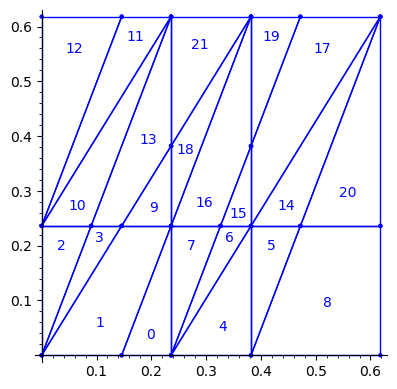

In [27]:
P5.plot()                    # optional long

In [28]:
beta4

Substitution 2d: {0: [[3]], 1: [[4]], 2: [[5]], 3: [[6]], 4: [[12]], 5: [[13]], 6: [[14]], 7: [[15]], 8: [[18]], 9: [[4, 0]], 10: [[5, 0]], 11: [[5, 1]], 12: [[5, 2]], 13: [[6, 0]], 14: [[13, 8]], 15: [[14, 10]], 16: [[15, 10]], 17: [[16, 11]], 18: [[17, 9]], 19: [[17, 11]], 20: [[18, 7]], 21: [[19, 9]]}

We rescale the partition $\mathcal{P}_5$ :

In [29]:
P5_scaled = (-phi*P5).translate((1,1))
R5e1_scaled = (-phi*R5e1).translate_domain((1,1))
R5e2_scaled = (-phi*R5e2).translate_domain((1,1))

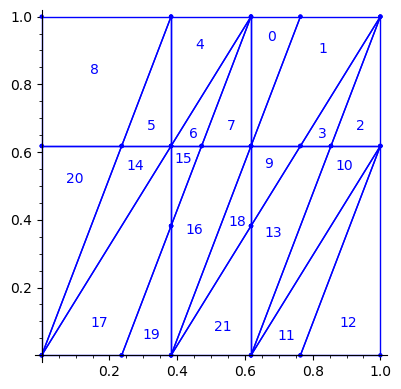

In [30]:
P5_scaled.plot()                  # optional long

The following allows to compute the induced partition $\mathcal{P}_6$ of $\mathbb{R}^2/\Gamma_6$, the substitution $\beta_5$ and the $\mathbb{Z}^2$-action $R_6$ on $\mathbb{R}^2/\Gamma_6$.

In [31]:
P6,beta5 = R5e1_scaled.induced_partition(x_le_phi_inv, P5_scaled, substitution_type='row')
R6e1,_ = R5e1_scaled.induced_transformation(x_le_phi_inv)
R6e2,_ = R5e2_scaled.induced_transformation(x_le_phi_inv)
P6

Polyhedron partition of 18 atoms with 18 letters

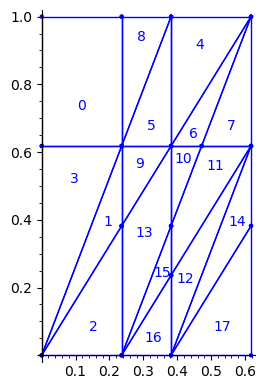

In [32]:
P6.plot()                    # optional long

In [33]:
beta5

Substitution 2d: {0: [[8]], 1: [[14]], 2: [[17]], 3: [[20]], 4: [[4], [1]], 5: [[5], [1]], 6: [[6], [3]], 7: [[7], [2]], 8: [[8], [0]], 9: [[14], [9]], 10: [[15], [13]], 11: [[16], [10]], 12: [[16], [11]], 13: [[17], [13]], 14: [[18], [12]], 15: [[19], [10]], 16: [[19], [11]], 17: [[21], [12]]}

The following allows to compute the induced partition $\mathcal{P}_7$ of $\mathbb{R}^2/\Gamma_7$, the substitution $\beta_6$ and the $\mathbb{Z}^2$-action $R_7$ on $\mathbb{R}^2/\Gamma_7$.

In [34]:
P7,beta6 = R6e2.induced_partition(y_le_phi_inv, P6, substitution_type='column')
R7e1,_ = R6e1.induced_transformation(y_le_phi_inv)
R7e2,_ = R6e2.induced_transformation(y_le_phi_inv)
P7

Polyhedron partition of 21 atoms with 21 letters

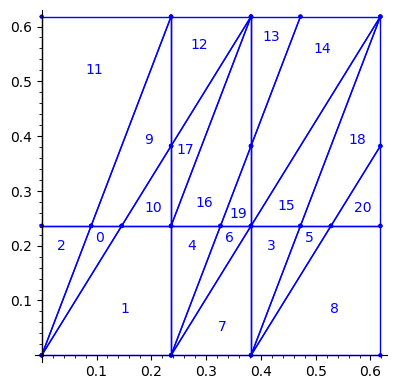

In [35]:
P7.plot()                    # optional long

In [36]:
beta6

Substitution 2d: {0: [[1]], 1: [[2]], 2: [[3]], 3: [[12]], 4: [[13]], 5: [[14]], 6: [[15]], 7: [[16]], 8: [[17]], 9: [[1, 0]], 10: [[2, 0]], 11: [[3, 0]], 12: [[9, 8]], 13: [[10, 4]], 14: [[11, 4]], 15: [[12, 6]], 16: [[13, 5]], 17: [[13, 8]], 18: [[14, 7]], 19: [[15, 5]], 20: [[17, 7]]}

We rescale the partition $\mathcal{P}_7$ :

In [37]:
P7_scaled = (-phi*P7).translate((1,1))
R7e1_scaled = (-phi*R7e1).translate_domain((1,1))
R7e2_scaled = (-phi*R7e2).translate_domain((1,1))

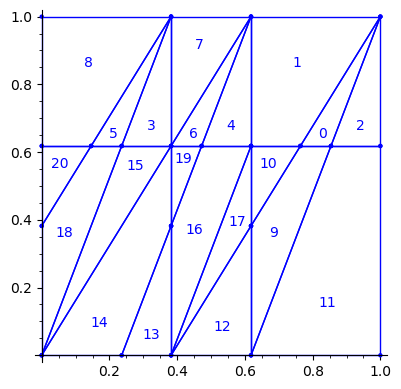

In [38]:
P7_scaled.plot()                  # optional long

The following allows to compute the induced partition $\mathcal{P}_8$ of $\mathbb{R}^2/\Gamma_8$, the substitution $\beta_7$ and the $\mathbb{Z}^2$-action $R_8$ on $\mathbb{R}^2/\Gamma_8$.

In [39]:
P8,beta7 = R7e1_scaled.induced_partition(x_le_phi_inv, P7_scaled, substitution_type='row')
R8e1,_ = R7e1_scaled.induced_transformation(x_le_phi_inv)
R8e2,_ = R7e2_scaled.induced_transformation(x_le_phi_inv)
P8

Polyhedron partition of 19 atoms with 19 letters

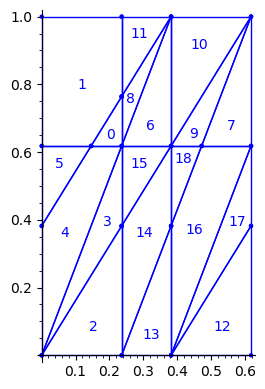

In [40]:
P8.plot()                    # optional long

In [41]:
beta7

Substitution 2d: {0: [[5]], 1: [[8]], 2: [[14]], 3: [[15]], 4: [[18]], 5: [[20]], 6: [[3], [1]], 7: [[4], [2]], 8: [[5], [1]], 9: [[6], [0]], 10: [[7], [1]], 11: [[8], [1]], 12: [[12], [11]], 13: [[13], [11]], 14: [[14], [9]], 15: [[15], [10]], 16: [[16], [11]], 17: [[17], [11]], 18: [[19], [9]]}

The following allows to compute the induced partition $\mathcal{P}_9$ of $\mathbb{R}^2/\Gamma_9$, the substitution $\beta_8$ and the $\mathbb{Z}^2$-action $R_9$ on $\mathbb{R}^2/\Gamma_9$.

In [42]:
P9,beta8 = R8e2.induced_partition(y_le_phi_inv, P8, substitution_type='column')
R9e1,_ = R8e1.induced_transformation(y_le_phi_inv)
R9e2,_ = R8e2.induced_transformation(y_le_phi_inv)
P9

Polyhedron partition of 21 atoms with 21 letters

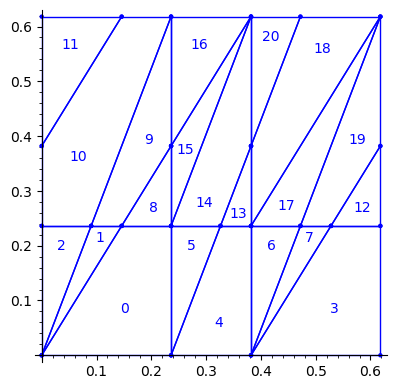

In [43]:
P9.plot()                    # optional long

In [44]:
beta8

Substitution 2d: {0: [[2]], 1: [[3]], 2: [[4]], 3: [[12]], 4: [[13]], 5: [[14]], 6: [[16]], 7: [[17]], 8: [[2, 0]], 9: [[3, 1]], 10: [[4, 1]], 11: [[5, 1]], 12: [[12, 7]], 13: [[13, 6]], 14: [[14, 6]], 15: [[14, 8]], 16: [[15, 11]], 17: [[16, 9]], 18: [[16, 10]], 19: [[17, 7]], 20: [[18, 10]]}

We rescale the partition $\mathcal{P}_9$ :

In [45]:
P9_scaled = (-phi*P9).translate((1,1))
R9e1_scaled = (-phi*R9e1).translate_domain((1,1))
R9e2_scaled = (-phi*R9e2).translate_domain((1,1))

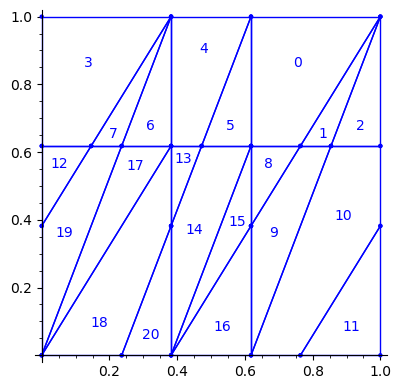

In [46]:
P9_scaled.plot()                  # optional long

The following allows to compute the induced partition $\mathcal{P}_{10}$ of $\mathbb{R}^2/\Gamma_{10}$, the substitution $\beta_9$ and the $\mathbb{Z}^2$-action $R_{10}$ on $\mathbb{R}^2/\Gamma_{10}$.

In [47]:
P10,beta9 = R9e1_scaled.induced_partition(x_le_phi_inv, P9_scaled, substitution_type='row')
R10e1,_ = R9e1_scaled.induced_transformation(x_le_phi_inv)
R10e2,_ = R9e2_scaled.induced_transformation(x_le_phi_inv)
P10

Polyhedron partition of 19 atoms with 19 letters

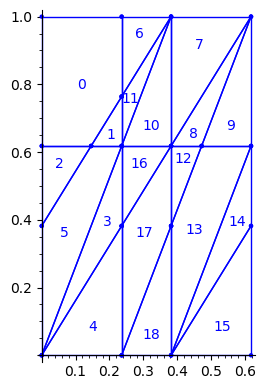

In [48]:
P10.plot()                    # optional long

In [49]:
beta9

Substitution 2d: {0: [[3]], 1: [[7]], 2: [[12]], 3: [[17]], 4: [[18]], 5: [[19]], 6: [[3], [0]], 7: [[4], [0]], 8: [[4], [1]], 9: [[5], [2]], 10: [[6], [0]], 11: [[7], [0]], 12: [[13], [9]], 13: [[14], [10]], 14: [[15], [10]], 15: [[16], [11]], 16: [[17], [8]], 17: [[18], [9]], 18: [[20], [10]]}

We show that $\mathcal{P}_8$ and $\mathcal{P}_{10}$ are equivalent:

In [50]:
P8.is_equal_up_to_relabeling(P10)

True

In [51]:
from slabbe import Substitution2d
tau = Substitution2d.from_permutation(P8.keys_permutation(P10))
tau

Substitution 2d: {0: [[1]], 1: [[0]], 2: [[4]], 3: [[3]], 4: [[5]], 5: [[2]], 6: [[10]], 7: [[9]], 8: [[11]], 9: [[8]], 10: [[7]], 11: [[6]], 12: [[15]], 13: [[18]], 14: [[17]], 15: [[16]], 16: [[13]], 17: [[14]], 18: [[12]]}

In [52]:
beta8*beta9*tau    # the self-similarity for P8

Substitution 2d: {0: [[17]], 1: [[12]], 2: [[16, 10]], 3: [[16, 9]], 4: [[17, 7]], 5: [[12, 7]], 6: [[16], [2]], 7: [[14], [4]], 8: [[17], [2]], 9: [[13], [3]], 10: [[13], [2]], 11: [[12], [2]], 12: [[15, 11], [5, 1]], 13: [[18, 10], [4, 1]], 14: [[16, 10], [3, 1]], 15: [[16, 9], [2, 0]], 16: [[14, 6], [4, 1]], 17: [[14, 8], [4, 1]], 18: [[13, 6], [3, 1]]}

We may check that the self-similarity for $\mathcal{P}_8$ satisfies $\zeta^{-1}\beta_8\beta_9\tau\zeta=\beta_{\mathcal{U}}$.

In [53]:
zeta = Substitution2d.from_permutation({0:0, 1:1, 2:9, 3:7, 4:8, 5:11, 6:10, 
7:6, 8:2, 9:4, 10:5, 11:3, 12:18, 13:14, 14:16, 15:13, 16:12, 17:17, 18:15})
betaU = Substitution2d({0: [[17]], 1: [[16]], 2: [[15], [11]], 3: [[13], [9]], 4: [[17], [8]], 5: [[16], [8]], 6: [[15], [8]], 7: [[14], [8]], 8: [[14, 6]], 9: [[17, 3]], 10: [[16, 3]], 11: [[14, 2]], 12: [[15, 7], [11, 1]], 13: [[14, 6], [11, 1]], 14: [[13, 7], [9, 1]], 15: [[12, 6], [9, 1]], 16: [[18, 5], [10, 1]], 17: [[13, 4], [9, 1]], 18: [[14, 2], [8, 0]]})
zeta.inverse()*beta8*beta9*tau*zeta  == betaU

True

In [54]:
betaU

Substitution 2d: {0: [[17]], 1: [[16]], 2: [[15], [11]], 3: [[13], [9]], 4: [[17], [8]], 5: [[16], [8]], 6: [[15], [8]], 7: [[14], [8]], 8: [[14, 6]], 9: [[17, 3]], 10: [[16, 3]], 11: [[14, 2]], 12: [[15, 7], [11, 1]], 13: [[14, 6], [11, 1]], 14: [[13, 7], [9, 1]], 15: [[12, 6], [9, 1]], 16: [[18, 5], [10, 1]], 17: [[13, 4], [9, 1]], 18: [[14, 2], [8, 0]]}

Observe that the $19 \times 19$ incidence matrix of $\beta_8\beta_9\tau$ is not hyperbolic but, as shown by its characteristic polynomial, it is hyperbolic on a 8-dimensional subspace:

In [55]:
(beta8*beta9*tau).incidence_matrix().charpoly().factor()

x^3 * (x - 1)^4 * (x + 1)^4 * (x^2 - 3*x + 1) * (x^2 + x - 1)^3